In [1]:
# import and initialize otter
import otter
grader = otter.Notebook("p9.ipynb")

In [2]:
import public_tests

In [3]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p9
# submitter: alghazzy
# partner: jmbruggink

# Project 9: Analyzing the Movies

## Learning Objectives:

In this project, you will demonstrate your ability to:
- use `matplotlib` to plot bar graphs and visualize statistics
- process data using dictionaries and lists that you build
- implement binning by writing algorithms that create dictionaries
- custom sort a list using the keyword parameter `key`'s argument.

Please go through [Lab-P9](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/tree/main/lab-p9) before starting this project. The lab introduces some useful techniques necessary for this project.

## Testing your code:

Along with this notebook, you must have downloaded the file `public_tests.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

**Important:** `public_tests.py` **cannot** verify your answers when the output is an image. Your **plots** will be **checked** by the Gradescope autograder, so you must **manually** confirm that your plots look correct by comparing with the images provided in the notebook.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P8 and P9 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P8, you have to sustain that partnership until the end of P9. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f23/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

**<font color = "red">Project partners must submit only one copy of their project on Gradescope, but they must include the names of both partners.</font>**

## Introduction:

In P8, you created very useful helper functions to parse the raw IMDb dataset. You also created useful data structures to store the data. In this project, you will be building on the work you did in P8 to analyze your favorite movies. This is a shorter project than usual, and **P9 will only have 10 questions for you to solve**.

## Data:

In P9, you will be analyzing the same dataset that you worked with in P8. You may download the files fresh, or just copy/paste the datasets from your P8 directory.

## Project Requirements:

You **may not** hardcode indices in your code, unless the question explicitly asks you to do so. If you open your `.csv` files with Excel, manually count through the rows and use this number to loop through the dataset, this is also considered as hardcoding. If any instances of hardcoding are found during code review, the Gradescope autograder will **deduct** points from your public score.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

Required Functions:
- `bucketize`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

Required Data Structures:
- `movies`
- `cast_buckets`
- `director_buckets`
- `genre_buckets`
- `year_buckets`

You are only allowed to define these data structures **once** and we'll **deduct** points from your public score on Gradescope if you redefine the values of these variables.

In this project (and the next), you will be asked to create **lists** of movies. For all such questions, **unless it is explicitly mentioned otherwise**, the movies should be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file. Similarly, for each movie, the **list** of `genres`, `directors`, and `cast` members should always be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file.

Students are only allowed to use Python commands and concepts that have been taught in the course prior to the release of P9. Therefore, you should not use the `pandas` module. The Gradescope autograder will **deduct** points from your public score otherwise.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f23-projects/-/blob/main/p9/rubric.md).

## Project Questions and Functions:

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import csv
import matplotlib
import pandas

## Loading the Movies Data

For all these questions, we will be looking at the movies in `mapping.csv` and `movies.csv`. You can load the list of movies using the functions you wrote in the last project.

Copy the functions you wrote in `p8.ipynb` to `p9.ipynb` to read the movies data. The functions you should include are `process_csv`, `get_mapping`, `get_raw_movies`, and `get_movies` along with any helper functions you used to write these. Do **not** copy/paste `find_specific_movies` here. Later in P9, we will provide you with a simpler version of that function, which does not require the use of the `copy` module.

In [5]:
# copy/paste the definition of process_csv from previous projects (p6 or p7)
# copy/paste the definitions of get_mapping, get_raw_movies, get_movies from p8.ipynb
# as well as any helper functions used by these functions here
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data
def get_mapping(path):
    csv_data = process_csv(path)
    csv_header = csv_data[0]
    rows = csv_data[0:]
    dict_x = {}
    
    for row in rows:
        dict_x[row[0]] = row[1]
        
    return dict_x
def get_raw_movies(path):
    raw_movies_list = []
    with open(path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        csv_header = next(reader)
        for row in reader:
            movie = {'title': row[csv_header.index('title')], 'year': int(row[csv_header.index('year')]), 'duration': int(row[csv_header.index('duration')]), 'genres': row[csv_header.index('genres')].split(', '), 'rating': float(row[csv_header.index('rating')]), 'directors': row[csv_header.index('directors')].split(', '), 'cast': row[csv_header.index('cast')].split(', ')}
                    
            raw_movies_list.append(movie)
    return raw_movies_list
def get_movies(movies_path, mapping_path):
    map_dict = get_mapping(mapping_path)
    raw_movies = get_raw_movies(movies_path)
    movies = []
    for raw_movie in raw_movies:
        movie = {} 
        movie['title'] = map_dict[raw_movie['title']]
        movie['year'] = int(raw_movie['year'])
        movie['duration'] = int(raw_movie['duration'])
        movie['genres'] = raw_movie['genres']
        movie['rating'] = float(raw_movie['rating'])
        movie['directors'] = [map_dict[director] for director in raw_movie['directors']]
        movie['cast'] = [map_dict[actor] for actor in raw_movie['cast']]
        movies.append(movie)

    return movies

Now, you can use `get_movies` to read the data in `movies.csv` and `mapping.csv` as you did in P8.

In [6]:
# create a list of dictionaries named 'movies' to store the data in 'movies.csv' and 'mapping.csv' as in p8
# do NOT display the value of this variable anywhere in this notebook

movies = movies = get_movies("movies.csv", "mapping.csv")


There should be *73075* **dictionaries** in the **list** `movies` and the first entry of `movies` should be a **dictionary** that looks as follows:

```python
{'title': 'A Grande Arte',
 'year': 1991,
 'duration': 104,
 'genres': ['Drama', 'Thriller'],
 'rating': 6.1,
 'directors': ['Walter Salles'],
 'cast': ['Peter Coyote', 'Tchéky Karyo', 'Amanda Pays', 'Raul Cortez']}
```

**Warning:** At this stage, it is expected that the function `get_movies` works correctly, and that `movies` is defined as it was in P8. If not, your code will run into issues in P9. So, make sure that this function works properly before you start P9. You can do that by **inserting a new cell** in Jupyter below this cell and verifying that the size of your variable `movies`, and that the first **dictionary** in `movies` is as it should be.

Also, just like in P8, delete any cells displaying the whole of `movies` data structure before turning in `p9.ipynb`.

Now, copy over the functions `plot_dict`, `median` and `year_to_decade` from Lab-P9.

In [7]:
# copy/paste the definitions of plot_dict, median, year_to_decade from "Lab-P9
# as well as any helper functions used by these functions here
def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16, figsize=(4 + len(d)//4, 4))
    ax.set_ylabel(label, fontsize=16)
def median(items):
    """
    median(items) returns the median of the list `items`
    """
    # sort the list
    sorted_list = sorted(items)
    # determine the length of the list
    list_len = len(items)
    if len(items) % 2 != 0: # determine whether length of the list is odd
        # return item in the middle using indexing
        return sorted_list[len(items) // 2]
    else:
        first_middle = sorted_list[(len(items) // 2) - 1] # use appropriate indexing
        second_middle = sorted_list[(len(items) // 2)] # use appropriate indexing
        return (first_middle + second_middle) / 2
def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        # TODO: first find the year in which the decade starts
        start_year = (year // 10) * 10 + 1
        end_year = start_year + 9
        decade = str(start_year) + " to " + str(end_year)
        #       when year % 10 != 0
        # TODO: define the variable 'decade'
    return decade

In P8, you were provided with a function `find_specific_movies` which functioned as some sort of a 'search bar' for the movies dataset. However, in order to use that function properly, you had to use the `copy` module to pass a *copy* of your list of movies to `find_specific_movies`. Making copies frequently is **not** a good coding practice. For this project, we will provide **a new version** of `find_specific_movies` that does **not** require using `copy`. Please go through the following function:

In [8]:
# modified find_specific_movies (doesn't require using copy module)
def find_specific_movies(movies, keyword):
    """
    find_specific_movies(movies, keyword) takes a list of movie dictionaries 
    and a keyword; it returns a list of movies that contain the keyword
    in either its title, genre, cast or directors.
    """
    movies_with_keyword = []
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['cast']):
            movies_with_keyword.append(movie)
    return movies_with_keyword

**Important:** **Even when you are not explicitly prompted to do so, using the `find_specific_movies` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of `find_specific_movies`.**

### Analyzing the Movies data

**Question 1:** What is the **median** `rating` of the movies that **involve** both *Clint Eastwood* and *Sergio Leone*?

You **must** make multiple calls to the `find_specific_movies` function to identify the movies which involve both *Clint Eastwood* and *Sergio Leone*.

In [9]:
# compute and store the answer in the variable 'median_eastwood_leone_rating', then display it
clint_eastwood = find_specific_movies(movies, "Clint Eastwood")
sergio_leone = find_specific_movies(movies, "Sergio Leone")
list_movies_both = [movie for movie in clint_eastwood if movie in sergio_leone]
list_ratings = [movie['rating'] for movie in list_movies_both]
median_rating = median(list_ratings)
median_eastwood_leone_rating = median_rating
median_eastwood_leone_rating

8.2

In [10]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`find_specific_movies` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q1 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'median calculation is incorrect (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q1 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'answer uses loops to iterate over dictionary keys (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 2:** Among all the *Toy Story* movies, which ones are the **highest** rated?

Your output **must** be a **list** of **dictionaries**. You **must** use `find_specific_movies` to identify all movies which have *Toy Story* as a substring of their `title`.

**Hint:** You could first find the **highest** `rating` that any *Toy Story* movie received, and then find all the *Toy Story* movies that received that `rating`.

In [11]:
# compute and store the answer in the variable 'highest_rated_toy_story_movies', then display it
toy_story_movies = find_specific_movies(movies, "Toy Story")
best_rating = max(movie['rating']for movie in toy_story_movies)
highest_rated_toy_story_movies = [movie for movie in toy_story_movies if movie['rating'] == best_rating]
highest_rated_toy_story_movies

[{'title': 'Toy Story',
  'year': 1995,
  'duration': 81,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['John Lasseter'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney']},
 {'title': 'Toy Story 3',
  'year': 2010,
  'duration': 103,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['Lee Unkrich'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Ned Beatty']}]

In [12]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`find_specific_movies` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'rating of highest rated *Toy Story* movie is hardcoded (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'all movies with the highest rating are not found (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'answer uses loops to iterate over dictionary keys (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Function 1: `bucketize(movies_list, category)` 

This function should take in a **list** of movie **dictionaries** as well as a **category** (i.e. `title`, `year`, `duration`, `genres`, `rating`, `directors`, or `cast`), and *bucketize* the **list** of movie **dictionaries** by this **category**.

For example, the output of `bucketize(movies, 'rating')` should be a **dictionary** so that all the unique values of `rating` of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that rating (e.g., the value of the key *6.4* should be the **list** of movie dictionaries with `rating` of *6.4*).

The output of `bucketize(movies, 'rating')` should look like this:

```python
{6.1: [{'title': 'A Grande Arte',
        'year': 1991,
        'duration': 104,
        'genres': ['Drama', 'Thriller'],
        'rating': 6.1,
        'directors': ['Walter Salles'],
        'cast': ['Peter Coyote', 'Tchéky Karyo', 'Amanda Pays', 'Raul Cortez']},
       {'title': 'Elena Undone',
        'year': 2010,
        'duration': 111,
        'genres': ['Drama', 'Romance'],
        'rating': 6.1,
        'directors': ['Nicole Conn'],
        'cast': ['Necar Zadegan', 'Thunderbird Dinwiddie', 'Gary Weeks', 'Sam Harris']},
       ...
      ],
 4.1: [{'title': 'Enemy Gold',
        'year': 1993,
        'duration': 92,
        'genres': ['Action', 'Crime'],
        'rating': 4.1,
        'directors': ['Christian Drew Sidaris'],
        'cast': ['Bruce Penhall', 'Mark Barriere', 'Suzi Simpson', 'Tanquil Lisa Collins']},
       {'title': "Dead Men Don't Die",
        'year': 1990,
        'duration': 94,
        'genres': ['Comedy', 'Crime', 'Horror'],
        'rating': 4.1,
        'directors': ['Malcolm Marmorstein'],
        'cast': ['Elliott Gould', 'Melissa Sue Anderson', 'Mark Moses', 'Mabel King']},
       ...
      ],
 ...
}
```

Similarly, the output of `bucketize(movies, 'cast')` should be a **dictionary** so that all the unique `cast` members of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that cast member as one of their `cast` (e.g., the value of the key *Kate Winslet* should be the **list** of movie dictionaries with *Kate Winslet* as one of their `cast` members).

The output of `bucketize(movies, 'cast')` should look like this:

```python
{{'Peter Coyote': [{'title': 'A Grande Arte',
                    'year': 1991,
                    'duration': 104,
                    'genres': ['Drama', 'Thriller'],
                    'rating': 6.1,
                    'directors': ['Walter Salles'],
                    'cast': ['Peter Coyote', 'Tchéky Karyo', 'Amanda Pays', 'Raul Cortez']},
                   {'title': 'No Deposit',
                    'year': 2015,
                    'duration': 80,
                    'genres': ['Drama'],
                    'rating': 5.6,
                    'directors': ["Frank D'Angelo"],
                    'cast': ['Paul Amato', 'Daniel Baldwin', 'Jason Blicker', 'Peter Coyote']},
                   ...
                  ],
 'Tchéky Karyo': [{'title': 'A Grande Arte',
                   'year': 1991,
                   'duration': 104,
                   'genres': ['Drama', 'Thriller'],
                   'rating': 6.1,
                   'directors': ['Walter Salles'],
                   'cast': ['Peter Coyote', 'Tchéky Karyo', 'Amanda Pays', 'Raul Cortez']},
                  {'title': 'Wing Commander',
                   'year': 1999,
                   'duration': 100,
                   'genres': ['Action', 'Adventure', 'Sci-Fi'],
                   'rating': 4.3,
                   'directors': ['Chris Roberts'],
                   'cast': ['Freddie Prinze Jr.', 'Matthew Lillard', 'Saffron Burrows', 'Tchéky Karyo']},
                   ...
                  ]
 ...
} 
```

**Hints:** Note that depending on whether or not the `category` represents a **list** or not, your function will have to behave differently. In P8, you created a function `bucketize_by_genre` that *bucketized* the list of movies by their genre. Take a moment to find that function; it will help you here. Also, take a moment to look at the buckets you made in Lab-P9.

In [13]:
# replace the ... with your code to finish the definition of bucketize
def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        if category in movie:
            category_value = movie[category]
        else:
            continue
        if type(category_value) == list:
            for item in category_value:
                if item not in buckets:
                    buckets[item] = []
                buckets[item].append(movie)
        else:
            if category_value not in buckets:
                buckets[category_value] = []
            buckets[category_value].append(movie)

    return buckets

In [14]:
grader.check("bucketize")

bucketize results: All test cases passed!
bucketize - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect when `category` data is stored in `movies` as a **string** (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect when `category` data is stored in `movies` as a **list** (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'categories are hardcoded while checking if their data is stored as a **list** or not (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function is defined more than once (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Important:** Just like `get_movies`, `bucketize` is quite a time-consuming function to run. Hence, you do **not** want to call `bucketize` on the same list of movies and category **more than once**. Throughout the project, we will frequently use bucketized lists of movies organized by their `cast`, `directors`, `genre`, and `year`. Rather than calling `bucketize` several times, we will store the bucketized lists in the following variables:

In [15]:
# define buckets for categories mentioned below, but do NOT display any of them

# bucketize the full list of movies by their cast.
cast_buckets = bucketize(movies, 'cast')
# bucketize the full list of movies by their directors.
director_buckets = bucketize(movies, 'directors')
# bucketize the full list of movies by their genre.
genre_buckets = bucketize(movies, 'genres')
# bucketize the full list of movies by their year.
year_buckets = bucketize(movies, 'year')


In [16]:
grader.check("cast_buckets")

cast_buckets results: All test cases passed!
cast_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
cast_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [17]:
grader.check("director_buckets")

director_buckets results: All test cases passed!
director_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
director_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [18]:
grader.check("genre_buckets")

genre_buckets results: All test cases passed!
genre_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
genre_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [19]:
grader.check("year_buckets")

year_buckets results: All test cases passed!
year_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
year_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Even when you are not explicitly prompted to do so, using these data structures and the `bucketize` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of these data structures and the `bucketize` function.

Remember, you can still use the `bucketize` function on a subset of the `movies` data structure (i.e. not the whole `movies` dataset). You are **not** limited to only using the variables defined above.

**Question 3:** List the movies that *Margot Robbie* was `cast` in.

Your output **must** be a **list** of **dictionaries**. You **must** answer this question by accessing the **value** of the correct **key** from the correct **bucket** defined in the previous cell.

In [20]:
# compute and store the answer in the variable 'robbie_movies', then display it
robbie_movies = cast_buckets.get('Margot Robbie')
robbie_movies

[{'title': 'Goodbye Christopher Robin',
  'year': 2017,
  'duration': 107,
  'genres': ['Biography', 'Drama', 'Family'],
  'rating': 7.1,
  'directors': ['Simon Curtis'],
  'cast': ['Domhnall Gleeson',
   'Margot Robbie',
   'Kelly Macdonald',
   'Vicki Pepperdine']},
 {'title': 'The Wolf of Wall Street',
  'year': 2013,
  'duration': 180,
  'genres': ['Biography', 'Comedy', 'Crime'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Leonardo DiCaprio',
   'Jonah Hill',
   'Margot Robbie',
   'Matthew McConaughey']},
 {'title': 'Suite Française',
  'year': 2014,
  'duration': 107,
  'genres': ['Drama', 'Romance', 'Thriller'],
  'rating': 7.0,
  'directors': ['Saul Dibb'],
  'cast': ['Michelle Williams',
   'Kristin Scott Thomas',
   'Margot Robbie',
   'Eric Godon']},
 {'title': 'I, Tonya',
  'year': 2017,
  'duration': 119,
  'genres': ['Biography', 'Comedy', 'Drama'],
  'rating': 7.5,
  'directors': ['Craig Gillespie'],
  'cast': ['Margot Robbie',
   'Sebastian Stan',


In [21]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`cast_buckets` data structure is not used (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 4:** **Plot** the **number** of movies in each *genre* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre**.

In [22]:
# first compute and store the dictionary in the variable 'genre_num', then display it
# do NOT plot just yet
genre_num = {}
for movie in movies:
    genres = movie["genres"]
    for genre in genres:
        if genre not in genre_num:
            genre_num[genre] = 1
        else:
            genre_num[genre] += 1
genre_num

{'Drama': 40806,
 'Thriller': 10749,
 'Action': 11813,
 'Crime': 10583,
 'Comedy': 24336,
 'Adventure': 7037,
 'Family': 3443,
 'Sci-Fi': 3336,
 'Romance': 12354,
 'Biography': 2507,
 'War': 1868,
 'History': 2238,
 'Fantasy': 3533,
 'Horror': 9127,
 'Mystery': 5413,
 'Animation': 2067,
 'Documentary': 1334,
 'Music': 1627,
 'Musical': 1537,
 'Western': 1283,
 'Film-Noir': 666,
 'Sport': 1105,
 'News': 22,
 'Reality-TV': 2}

In [23]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q4 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q4 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `genre_num` as a **bar graph**.

**Important Warning:** `public_tests.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot below to reduce the size of your notebook. Make sure your plot matches the plot below, before you do so.

Your plot should look like this:

<div>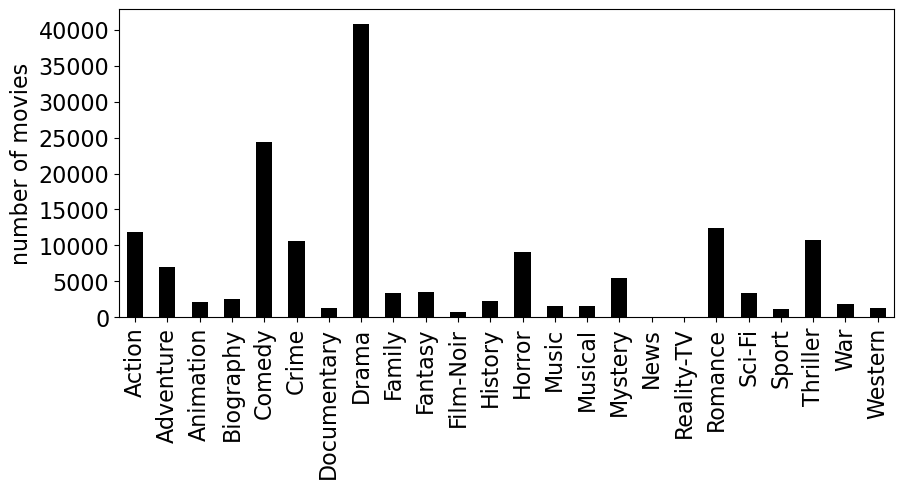</div>

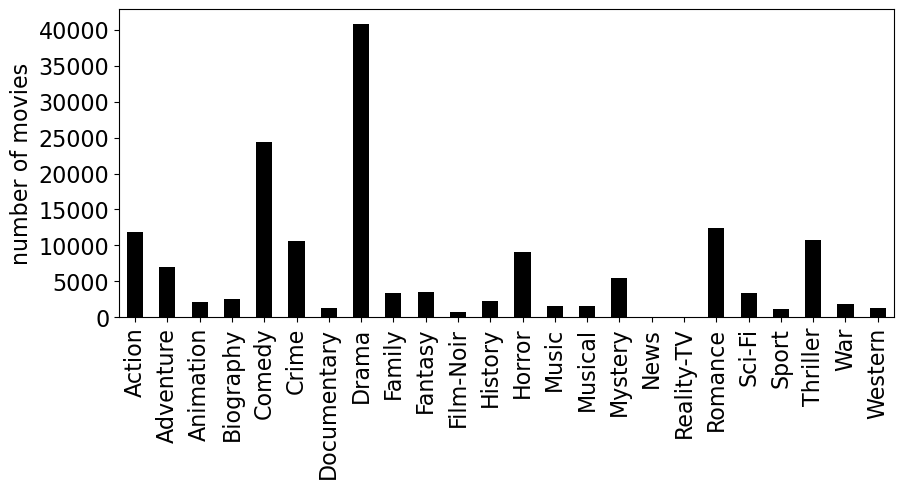

In [24]:
# plot 'genre_num' with the y-axis labelled 'number of movies'

plot_dict(genre_num, 'number of movies')

**Food for thought:** Can you tell what the most popular **genres** are from the plot? Do you see anything surprising in this plot?

**Question 5:** **Plot** the **number** of movies **directed** by *Stanley Kubrick* in each *genre* as a **bar graph**.

You **must** only include those `genres` in which *Stanley Kubrick* has directed **at least** one movie, in your plot.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre** directed by *Stanley Kubrick*.

**Hint:** Think about how you can use functions such as `bucketize` on a subset of movies for the category that you are interested in.

In [25]:
# first compute and store the dictionary in the variable 'kubrick_genres', then display it
# do NOT plot just yet
kubrick_genres = find_specific_movies(movies, 'Stanley Kubrick')
x = {}
for movie in kubrick_genres:
    genres_kubrick = movie["genres"]
    for genre in genres_kubrick:
        if genre not in x:
            x[genre] = 1
        else:
            x[genre] += 1
kubrick_genres = x
kubrick_genres

{'Crime': 3,
 'Drama': 9,
 'Film-Noir': 2,
 'Horror': 1,
 'Adventure': 3,
 'War': 5,
 'Comedy': 1,
 'Thriller': 2,
 'Mystery': 1,
 'Sci-Fi': 2,
 'Biography': 1}

In [26]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `kubrick_genres` as a **bar graph**.

**Important Warning:** `public_tests.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot below to reduce the size of your notebook. Make sure your plot matches the plot below, before you do so.

Your plot should look like this:

<div>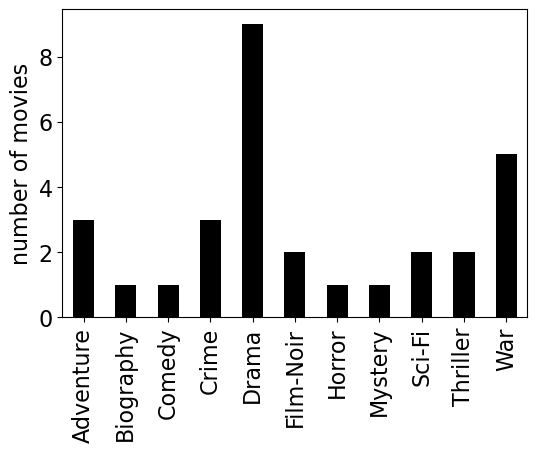</div>

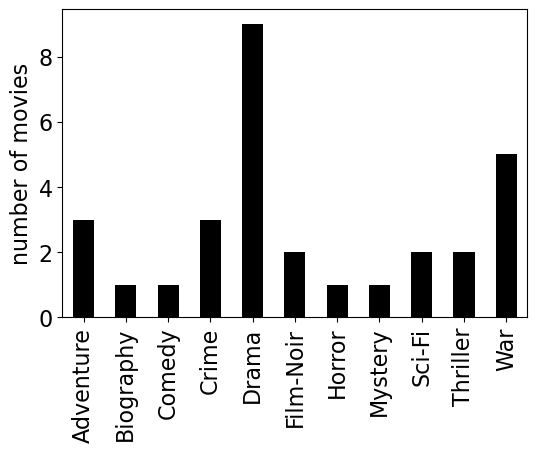

In [27]:
# now plot 'kubrick_genres' with the y-axis labelled 'number of movies'
plot_dict(kubrick_genres, 'number of movies')

**Food for thought:** Can you similarly **plot** the **number** of films directed by your favorite director or starring your favorite cast member in each **genre**?

**Question 6:** **Plot** the **number** of **Sci-Fi** movies released in each *decade* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **decade** to the **number** of movies in released in that **decade**. This dictionary should look like this:

```python
{'2011 to 2020': 1100,
 '1961 to 1970': 201,
 '1911 to 1920': 6,
 '1981 to 1990': 383,
 '1951 to 1960': 198,
 '1941 to 1950': 24,
 '1991 to 2000': 389,
 '2021 to 2030': 242,
 '2001 to 2010': 517,
 '1971 to 1980': 243,
 '1931 to 1940': 28,
 '1921 to 1930': 5}
```

**Hint:** You should use `year_to_decade` function to get the decade for a movie's year

In [28]:
# first compute and store the dictionary in the variable 'sci_fi_decade_mapping', then display it
# do NOT plot just yet
x = {}
for movie in movies:
    y = year_to_decade(movie['year'])
    if 'Sci-Fi' in movie['genres']:
        x[y] = x.get(y, 0) + 1
sci_fi_decade_mapping = x
sci_fi_decade_mapping

{'2011 to 2020': 1100,
 '1961 to 1970': 201,
 '1911 to 1920': 6,
 '1981 to 1990': 383,
 '1951 to 1960': 198,
 '1941 to 1950': 24,
 '1991 to 2000': 389,
 '2021 to 2030': 242,
 '2001 to 2010': 517,
 '1971 to 1980': 243,
 '1931 to 1940': 28,
 '1921 to 1930': 5}

In [29]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `sci_fi_decade_mapping` as a **bar graph**.

**Important Warning:** `public_tests.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot below to reduce the size of your notebook. Make sure your plot matches the plot below, before you do so.

Your plot should look like this:

<div>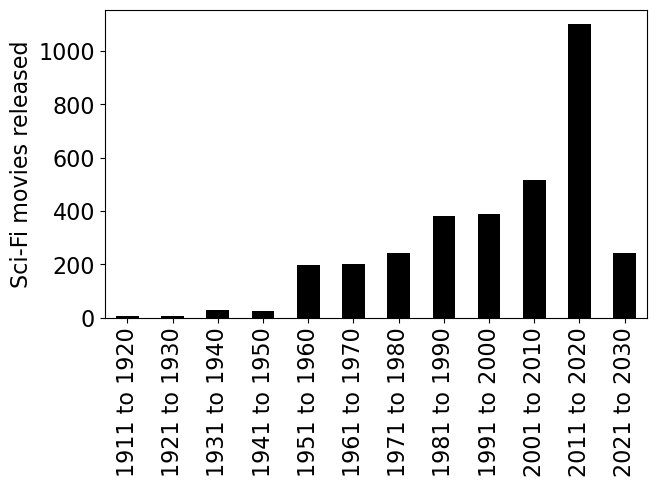</div>

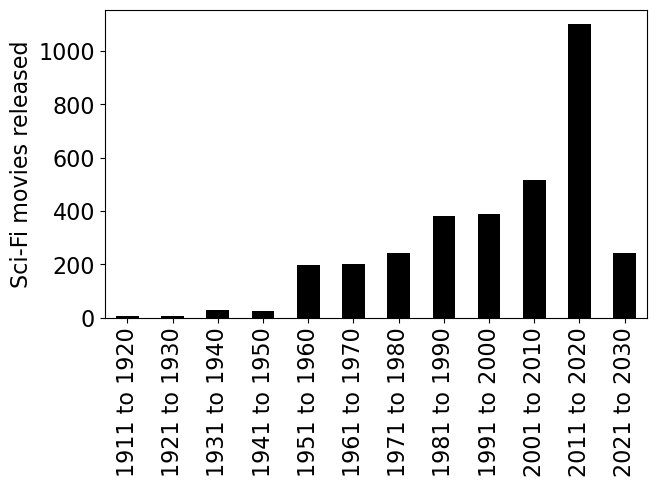

In [30]:
# now plot 'sci_fi_decade_mapping' with the y-axis labelled 'Sci-Fi movies released'
plot_dict(sci_fi_decade_mapping, 'Sci-Fi movies released')

**Food for thought:** Can you explain the shape of this plot? Why do you think the number of Sci-Fi movies increased so rapidly over the last decade? If you want, you could compare this plot against plots of other genres (such as `Western` or `Horror`).

**Question 7:** **Plot** the **median** `rating` of movies in each `genre` directed by *James Cameron* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** of movies directed by *James Cameron* to the **median** `rating` of all movies in that **genre**. Note that your dictionary **must not** contain any genres in which *James Cameron* has not directed any movie.

In [31]:
# first compute and store the dictionary in the variable 'cameron_median_genres', then display it
# do NOT plot just yet
#cameron_median_genres = find_specific_movies(movies, 'James Cameron')
#for movie in cameron_median_genres:
z = {}
for x in movies:
    if 'James Cameron' in x['directors']:
        genres = x['genres']
        rating = x['rating']
        for genre in genres:
            if genre not in z:
                z[genre] = []
            z[genre].append(rating)
for genre, ratings in z.items():
    z[genre] = median(ratings)
cameron_median_genres = z
cameron_median_genres

{'Action': 8.0,
 'Sci-Fi': 8.25,
 'Adventure': 7.75,
 'Fantasy': 7.75,
 'Drama': 7.7,
 'Mystery': 7.5,
 'Comedy': 7.3,
 'Thriller': 5.55,
 'Horror': 3.8,
 'Romance': 7.9}

In [32]:
grader.check("q7")

q7 results: All test cases passed!
q7 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q7 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q7 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Now, **plot** `cameron_median_genres` as a **bar graph**.

**Important Warning:** `public_tests.py` can only check that the **dictionary** has the correct key/value pairs, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. The Gradescope autograder will deduct points if your plot is not visible in the **cell below**, or if it is not properly labelled.

**Hint:** If the `grader.export` cell fails to run because the file size is too large, you can delete the plot below to reduce the size of your notebook. Make sure your plot matches the plot below, before you do so.

Your plot should look like this:

<div>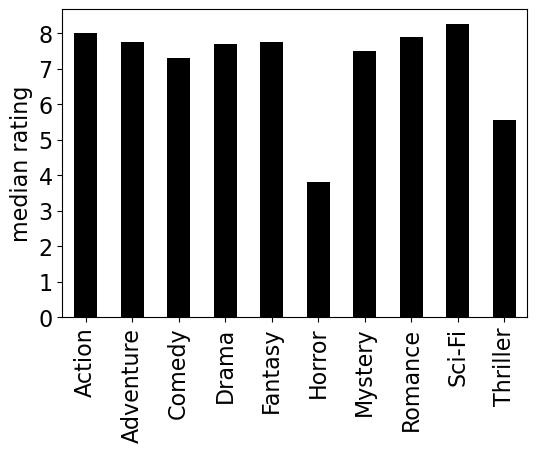</div>

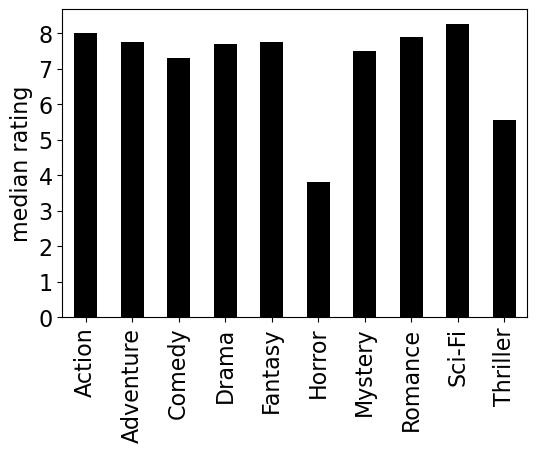

In [33]:
# now plot 'cameron_median_genres' with the y-axis labelled 'median rating'
plot_dict(cameron_median_genres, 'median rating')

**Food for thought:** *James Cameron* has directed many critically acclaimed movies such as *Aliens*, *The Terminator*, *Avatar*, and *Titanic*. Nevertheless, median ratings of his work in the *Thriller*, and especially *Horror* genres are surprisingly lackluster. Can you explain this inconsistency?

Hint: Take a look at the years of release of the films in these genres. 

The visualization in Question 7 immediately tells us that the **median** *Fantasy* movie directed by *James Cameron* is rated higher than the **median** *Horror* movie. However, it is a little hard to tell how the **median** *Romance* movie fares against the **median** *Adventure* movie. In order to compare the `genres`, it would be useful to **sort** the `genres` by their **median** `rating`.

Refer [Mike's](???), [Gurmail's](???) or [Cole's](???) lecture notes on using function references to sort a collection by value(s) related to that collection's elements.

**Question 8:** Produce a **list** of `genres` of films directed by *James Cameron* sorted in **decreasing order** of their **median** `rating`.

**Hint:** Refer to Task 4.2 in Lab-P9 to understand how to sort a collection using the `key` parameter.

In [34]:
# compute and store the answer in the variable 'cameron_genres_desc', then display it
def get_value(item):
    '''get_value(item) takes in a tuple item = (key, value)
    and returns the value which is at index 1 of the tuple'''
    return item[1]
cameron_genres_desc = []
cameron_genres_desc = sorted(list(z.items()), key=get_value, reverse = True)
for i in range(len(cameron_genres_desc)):
    cameron_genres_desc[i] = cameron_genres_desc[i][0]
cameron_genres_desc

['Sci-Fi',
 'Action',
 'Romance',
 'Adventure',
 'Fantasy',
 'Drama',
 'Mystery',
 'Comedy',
 'Thriller',
 'Horror']

In [35]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q8 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'recomputed variable defined in Question 7 (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 9:** Produce a **list** of movies directed by *Martin Scorsese* and starring *Robert De Niro* sorted in **increasing** order of their `year` of release.

Your output **must** be a **list** of **dictionaries** of movies having *Martin Scorsese* as one of the `directors`, and *Robert De Niro* as one of the `cast` members, that are **sorted** in **increasing** order of their `year`.

In [36]:
# compute and store the answer in the variable 'scorsese_de_niro_movies', then display it
scorsese_de_niro_movies = []
for movie in movies:
    if 'Martin Scorsese' in movie['directors'] and 'Robert De Niro' in movie['cast']:
        scorsese_de_niro_movies.append(movie)
scorsese_de_niro_movies.sort(key = lambda sdn_movies:sdn_movies['year'])
scorsese_de_niro_movies

[{'title': 'Mean Streets',
  'year': 1973,
  'duration': 112,
  'genres': ['Crime', 'Drama', 'Thriller'],
  'rating': 7.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Harvey Keitel', 'David Proval', 'Amy Robinson']},
 {'title': 'Taxi Driver',
  'year': 1976,
  'duration': 114,
  'genres': ['Crime', 'Drama'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro',
   'Jodie Foster',
   'Cybill Shepherd',
   'Albert Brooks']},
 {'title': 'New York, New York',
  'year': 1977,
  'duration': 155,
  'genres': ['Drama', 'Music', 'Musical'],
  'rating': 6.6,
  'directors': ['Martin Scorsese'],
  'cast': ['Liza Minnelli',
   'Robert De Niro',
   'Lionel Stander',
   'Barry Primus']},
 {'title': 'Raging Bull',
  'year': 1980,
  'duration': 129,
  'genres': ['Biography', 'Drama', 'Sport'],
  'rating': 8.1,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Cathy Moriarty', 'Joe Pesci', 'Frank Vincent']},
 {'title': 'The King of Comedy

In [37]:
grader.check("q9")

q9 results: All test cases passed!
q9 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q9 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'does not find only the movies directed by *Martin Scorsese* and starring *Robert De Niro* (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you think of other famous director-actor combinations? Can you find a combination with more movies than *Scorsese* and *De Niro*?

### Finding the best `directors`

Notice that the movie with the **highest** `rating` in the dataset is

```python
{'title': 'Red Sandal Wood',
  'year': 2023,
  'duration': 94,
  'genres': ['Action', 'Thriller'],
  'rating': 9.9,
  'directors': ['Guru Ramaanujam'],
  'cast': ['Vetri', 'Diya Mayuri', 'Ramachandra Raju', 'Abhi']}
```

This movie is the **only** movie directed by this `director`. So, it is hardly appropriate to use this one movie to hail this director as one of the best ever. Moreover, **nine out of the top ten** highest rated movies in the dataset happen to be from just the `year` **2023**, while **over half of the top hundred** highest rated movies were released after the `year` *2020*. This is explained by the fact that IMDb `ratings` tend to be **inflated** soon after release, and *settle* down after a while.

Therefore, if we want to identify who the **best** directors are, it would be a good idea to ignore the movies that were released **after** the `year` *2020*, and to restrict our attention to `directors` who have directed a **decent number** of movies. 

**Question 10:** Produce a **list** of `directors` who have directed **at least** *10* movies, have a **median** `rating` of **at least** *7.5*, and have a **minimum** `rating` of **at least** *5.0*. You **must** **exclude** all movies released **after** the `year` *2020*.

Your output **must** be a **list** of the names of the `directors`. The order does **not** matter.

**Hint**: You must first create a **list** of movies **excluding** the movies released **after** the `year` *2020*. Then, among these movies, you must find the `directors` who have directed `>= 10` movies, and whose movies have a **median** `rating` of `>= 7.5`, as well as a **minimum** `rating` of `>= 5.0`.

In [38]:
# compute and store the answer in the variable 'best_directors', then display it
number_of_director = {}
movies_2020 = [movie for movie in movies if movie['year'] <= 2020]
for movie in movies_2020:
    for director in movie['directors']:
        number_of_director[director] = number_of_director.get(director, 0) + 1
median1 = {}
min1 = {}
for movie in movies_2020:
    for director in movie['directors']:
        if director not in median1:
            median1[director] = []
            min1[director] = []
        median1[director].append(movie['rating'])
        min1[director].append(movie['rating'])
best_directors = []
for director, count in number_of_director.items():
    if count >= 10:
        median_rating = median(median1[director])
        minimum_rating = min(min1[director])
        if median_rating >= 7.5 and minimum_rating >= 5.0:
            best_directors.append(director)
best_directors

['William Wyler',
 'P. Padmarajan',
 'Christopher Nolan',
 'Masaki Kobayashi',
 'Satyajit Ray',
 'Jean-Pierre Melville',
 'Quentin Tarantino',
 'Akira Kurosawa',
 'Singeetam Srinivasa Rao',
 'Theodoros Angelopoulos',
 'Martin Scorsese',
 'Yoshikazu Yasuhiko',
 'Sibi Malayil',
 'S.S. Rajamouli',
 'Ertem Egilmez',
 'Hayao Miyazaki',
 'Preston Sturges',
 'Ingmar Bergman',
 'Georgiy Daneliya',
 'Sergiu Nicolaescu',
 'S. Shankar',
 'Stanley Kubrick',
 'Shyam Benegal',
 'Michael Cacoyannis',
 'K. Balachander',
 'Gulzar',
 'Krzysztof Kieslowski',
 'Yasujirô Ozu',
 'Oldrich Lipský',
 'Mani Ratnam',
 'Rituparno Ghosh',
 'Nikita Mikhalkov',
 'Goran Markovic',
 'Bahram Beyzaie',
 'David Fincher']

In [39]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'movies released after the `year` *2020* are not excluded (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect comparison operators are used to check if the **number** of movies, **median**, and **minimum** `rating` are as expected (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** How many of these directors can you recognize? Do you spot your favorite director in that list? Can you come up with better criteria for deciding who the best directors are?

In [40]:
grader.check("general_deductions")

general_deductions results: All test cases passed!
general_deductions - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Outputs not visible/did not save the notebook file prior to running the cell containing "export". We cannot see your output if you do not save before generating the zip file. (-3)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Used concepts/modules such as csv.DictReader and pandas not covered in class yet. Note that built-in functions that you have been introduced to can be used. (-3)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Large outputs such as movies are displayed in the notebook. (-3)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Import statements are not mentioned in the required cell at the top of the notebook. (-1)'. The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [41]:
grader.check("summary")

summary results: All test cases passed!

## Submission
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. If you completed the project with a **partner**, make sure to **add their name** by clicking "Add Group Member"
in Gradescope when uploading the zip file.
3. Check **Gradescope** results as soon as the auto-grader execution gets completed.
4. Your **final score** for this project is the score that you see on **Gradescope**.
5. You are **allowed** to resubmit on Gradescope as many times as you want to.
6. **Contact** a TA/PM if you lose any points on Gradescope for any **unclear reasons**.

In [ ]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

In [ ]:
!jupytext --to py p9.ipynb

In [ ]:
public_tests.check_file_size("p9.ipynb")
grader.export(pdf=False, run_tests=False, files=["p9.py"])